In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("/Users/zheguan/CWR_fig/Customer_Churn_Data_Large.xlsx", sheet_name= None)

In [93]:
Customer_Demographics = pd.merge(data['Customer_Demographics'], data['Churn_Status'], how="left", on="CustomerID")
train_data, test_data = train_test_split(Customer_Demographics, test_size=0.2, random_state=42, stratify=Customer_Demographics['ChurnStatus'])

In [95]:
train_data.to_csv("./train_data.csv")
test_data.to_csv("./test_data.csv")

In [102]:
train_data["Age_range"]= pd.cut(train_data["Age"],
                               bins = [15, 20, 30, 40, 50, 60, np.inf],
                               labels = ["15-20", "20-30", "30-40", "40-50", "50-60", "60+"])

In [103]:
print(train_data)                           

     CustomerID  Age Gender MaritalStatus IncomeLevel  ChurnStatus Age_range
367         368   41      F       Married        High            0     40-50
243         244   55      F       Widowed        High            0     50-60
592         593   54      F        Single      Medium            0     50-60
487         488   28      F       Married      Medium            1     20-30
477         478   66      M        Single         Low            1       60+
..          ...  ...    ...           ...         ...          ...       ...
888         889   30      M       Married        High            0     20-30
700         701   34      F       Widowed        High            0     30-40
754         755   41      F       Widowed        High            0     40-50
721         722   43      F      Divorced        High            0     40-50
349         350   18      M      Divorced         Low            0     15-20

[800 rows x 7 columns]


In [104]:
Age_distribution = pd.crosstab(train_data["Age"],train_data["ChurnStatus"],normalize="index").reset_index()

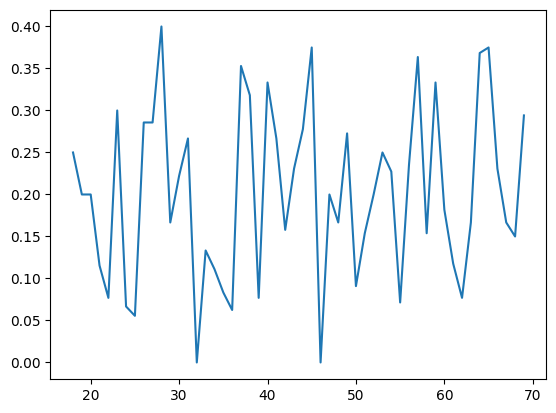

In [105]:
plt.plot(Age_distribution["Age"],Age_distribution[1])

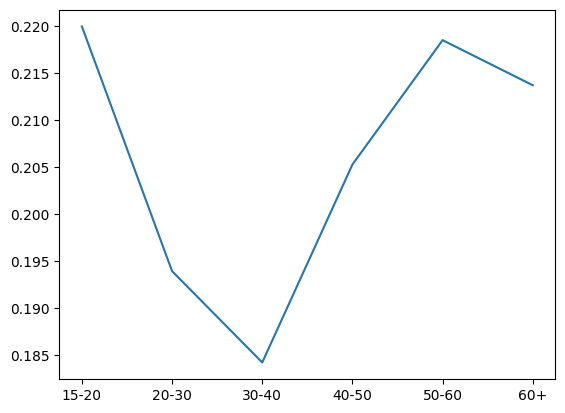

In [106]:
Agerange_distribution = pd.crosstab(train_data["Age_range"],train_data["ChurnStatus"],normalize="index").reset_index()
plt.plot(Agerange_distribution["Age_range"],Agerange_distribution[1])

In [108]:
average_churn_rate = sum(train_data['ChurnStatus'])/train_data.shape[0]
average_churn_rate

0.20375

In [109]:
train_data

CustomerID  Age Gender MaritalStatus IncomeLevel  ChurnStatus Age_range
367         368   41      F       Married        High            0     40-50
243         244   55      F       Widowed        High            0     50-60
592         593   54      F        Single      Medium            0     50-60
487         488   28      F       Married      Medium            1     20-30
477         478   66      M        Single         Low            1       60+
..          ...  ...    ...           ...         ...          ...       ...
888         889   30      M       Married        High            0     20-30
700         701   34      F       Widowed        High            0     30-40
754         755   41      F       Widowed        High            0     40-50
721         722   43      F      Divorced        High            0     40-50
349         350   18      M      Divorced         Low            0     15-20

[800 rows x 7 columns]

In [87]:
def cal_Zscore(df, input_col, target_col):
    average_churn_rate = sum(Customer_Demographics[target_col])/Customer_Demographics.shape[0]
    
    Distribution = pd.crosstab(Customer_Demographics[input_col],Customer_Demographics[target_col],normalize="index").reset_index()
    Distribution['number'] = Distribution[input_col].map(Customer_Demographics.groupby(input_col).size().astype(float))
    Distribution["sigma"] = Distribution[0]*Distribution[1]/Distribution['number'].astype(float)
    Distribution["Zscore_"+input_col+"diff"] = (Distribution[1]-average_churn_rate)/Distribution["sigma"]
    
    df = pd.merge(df, Distribution[[input_col, "Zscore_"+input_col+"diff"]], how = "left", on = input_col)
    
    return df,Distribution,average_churn_rate
    

In [606]:
Gender_Distribution = cal_Zscore(train_data, "Gender", "ChurnStatus")[1]
Age_rangeDistribution = cal_Zscore(train_data, "Age_range", "ChurnStatus")[1]
MaritalStatus_Distribution = cal_Zscore(train_data, "MaritalStatus", "ChurnStatus")[1]
IncomeLevel_Distribution = cal_Zscore(train_data, "IncomeLevel", "ChurnStatus")[1]

In [112]:
print(Gender_Distribution, Age_rangeDistribution, MaritalStatus_Distribution, IncomeLevel_Distribution)
Gender_Distribution.to_csv("Data/Gender_Distribution.csv")
Age_rangeDistribution.to_csv("Data/Age_rangeDistribution.csv")
MaritalStatus_Distribution.to_csv("Data/MaritalStatus_Distribution.csv")
IncomeLevel_Distribution.to_csv("Data/IncomeLevel_Distribution.csv")

ChurnStatus Gender         0         1  number     sigma  Zscore_Genderdiff
0                F  0.803119  0.196881   513.0  0.000308         -23.096539
1                M  0.788501  0.211499   487.0  0.000342          21.898796 ChurnStatus Age_range         0         1 number     sigma  \
0               15-20  0.789474  0.210526   57.0  0.002916   
1               20-30  0.808612  0.191388  209.0  0.000740   
2               30-40  0.812500  0.187500  176.0  0.000866   
3               40-50  0.790576  0.209424  191.0  0.000867   
4               50-60  0.777202  0.222798  193.0  0.000897   
5                 60+  0.793103  0.206897  174.0  0.000943   

ChurnStatus  Zscore_Age_rangediff  
0                        2.238200  
1                      -17.033005  
2                      -19.062154  
3                        6.257337  
4                       20.951841  
5                        3.071478   ChurnStatus MaritalStatus         0         1  number     sigma  \
0                D

In [119]:
distributions = {
    "Gender": Gender_Distribution,
    "Age_range":Age_rangeDistribution,
    "MaritalStatus":MaritalStatus_Distribution,
    "IncomeLevel":IncomeLevel_Distribution
}

In [117]:
pd.merge(train_data, Gender_Distribution[["Gender","Zscore_Genderdiff"]], how="left", on = "Gender")

CustomerID  Age Gender MaritalStatus IncomeLevel  ChurnStatus Age_range  \
0           368   41      F       Married        High            0     40-50   
1           244   55      F       Widowed        High            0     50-60   
2           593   54      F        Single      Medium            0     50-60   
3           488   28      F       Married      Medium            1     20-30   
4           478   66      M        Single         Low            1       60+   
..          ...  ...    ...           ...         ...          ...       ...   
795         889   30      M       Married        High            0     20-30   
796         701   34      F       Widowed        High            0     30-40   
797         755   41      F       Widowed        High            0     40-50   
798         722   43      F      Divorced        High            0     40-50   
799         350   18      M      Divorced         Low            0     15-20   

     Zscore_Genderdiff  
0           -23.096539  
1           -23.096539  
2           -23.096539  
3           -23.096539  
4            21.898796  
..                 ...  
795          21.898796  
796         -23.096539  
797         -23.096539  
798         -23.096539  
799          21.898796  

[800 rows x 8 columns]

In [120]:
def merge_distribution(ori_df, dic):
    
    data = ori_df

    for key, distribution in dic.items():
        data = pd.merge(data, distribution[[key,"Zscore_"+key+"diff"]], how="left", on = key)
        
    return data 

In [127]:
enhanced_train_data = merge_distribution(train_data, distributions) 

<Axes: >

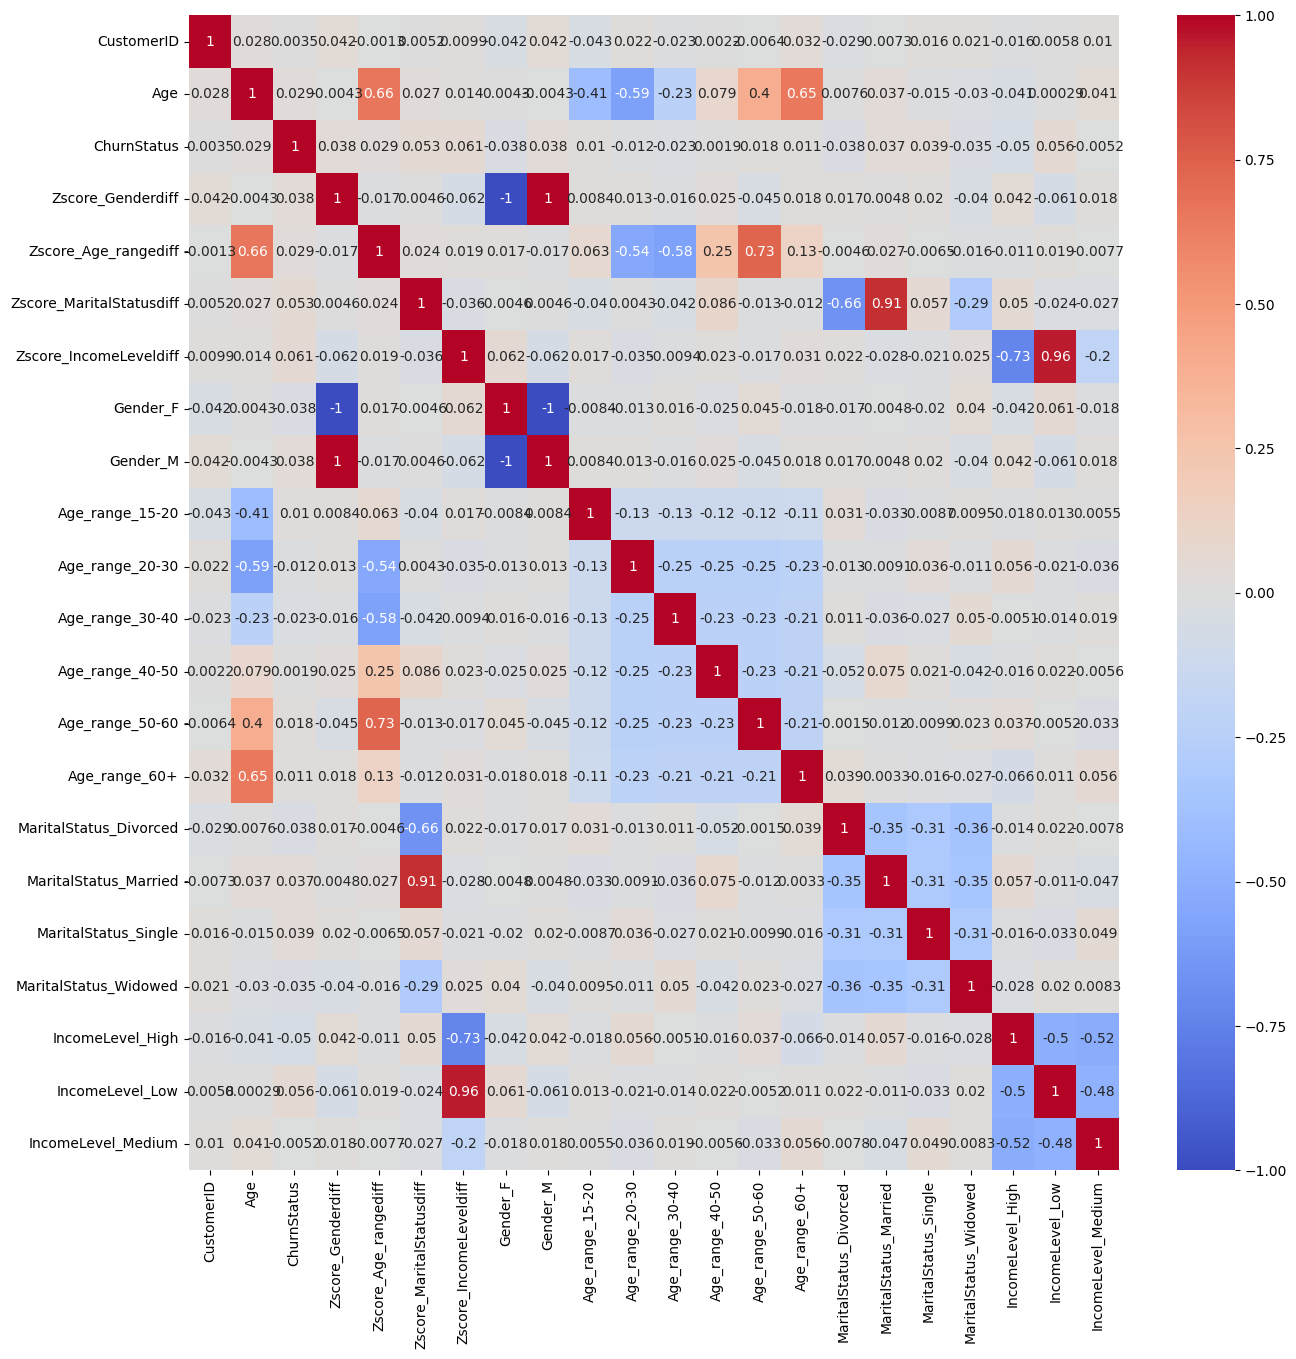

In [134]:
corr_df = pd.get_dummies(enhanced_train_data, columns=["Gender", "Age_range", 'MaritalStatus', 'IncomeLevel']).corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

In [607]:
from sklearn.model_selection import train_test_split

# 假设 enhanced_train_data 是你的完整数据集
X = enhanced_train_data.drop(columns=["ChurnStatus"])  # 目标变量
y = enhanced_train_data["ChurnStatus"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练 CatBoost 模型
from catboost import CatBoostClassifier

cat_features = list(X.select_dtypes(include=["object", "category"]).columns)

model = CatBoostClassifier(iterations=100, depth=6, verbose=0)
model.fit(X_train, y_train, cat_features=cat_features)

# 预测
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report


In [609]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.4f}")
# ✅ 4️⃣ 计算分类报告
report = classification_report(y_test, y_pred)
print("分类报告:\n", report)

模型准确率: 0.8063
分类报告:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       129
           1       0.00      0.00      0.00        31

    accuracy                           0.81       160
   macro avg       0.40      0.50      0.45       160
weighted avg       0.65      0.81      0.72       160



/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/zheguan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [612]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 目标变量
X = enhanced_train_data.drop(columns=["ChurnStatus"])
y = enhanced_train_data["ChurnStatus"]


# One-Hot Encoding 处理分类变量
X = pd.get_dummies(X, columns=["Gender", "MaritalStatus", "IncomeLevel", "Age_range"], drop_first=True)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ 1️⃣ 使用欠采样（Undersampling）减少多数类样本
rus = RandomUnderSampler(sampling_strategy=0.6, random_state=42)  
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# ✅ 2️⃣ 训练 RandomForest，使用欠采样后的数据
rf_model = RandomForestClassifier(n_estimators=5500, max_depth=20, random_state=42, class_weight="balanced_subsample")
rf_model.fit(X_train_resampled, y_train_resampled)

# ✅ 3️⃣ 预测
y_pred = rf_model.predict(X_test)

# ✅ 4️⃣ 计算分类报告
report = classification_report(y_test, y_pred)
print("分类报告:\n", report)


分类报告:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       127
           1       0.26      0.27      0.27        33

    accuracy                           0.69       160
   macro avg       0.54      0.54      0.54       160
weighted avg       0.70      0.69      0.70       160



In [135]:
Customer_Service = data['Customer_Service']

In [140]:
Customer_Service = pd.merge(Customer_Service, data['Churn_Status'], how = "left", on = "CustomerID")


In [242]:
Customer_Service

CustomerID  InteractionID InteractionDate InteractionType  \
0              1           6363      2022-03-31         Inquiry   
1              2           3329      2022-03-17         Inquiry   
2              3           9976      2022-08-24         Inquiry   
3              4           7354      2022-11-18         Inquiry   
4              4           5393      2022-07-03         Inquiry   
...          ...            ...             ...             ...   
997          990           3671      2022-10-25       Complaint   
998          992           2114      2022-09-29        Feedback   
999          994           3087      2022-07-02       Complaint   
1000         994           8508      2022-05-14       Complaint   
1001         995           9101      2022-05-02         Inquiry   

     ResolutionStatus  ChurnStatus  
0            Resolved            0  
1            Resolved            1  
2            Resolved            0  
3            Resolved            0  
4          Unresolved            0  
...               ...          ...  
997        Unresolved            1  
998        Unresolved            0  
999        Unresolved            0  
1000       Unresolved            0  
1001         Resolved            1  

[1002 rows x 6 columns]

In [162]:
prob_InteractionType = Customer_Service.groupby(["InteractionType","ChurnStatus"])["CustomerID"].nunique().unstack().reset_index()
prob_InteractionType["churn_rate"] = prob_InteractionType[1]/(prob_InteractionType[1]+prob_InteractionType[0])

In [260]:
print(Customer_Service.groupby(["InteractionType","ChurnStatus"])["CustomerID"].size().unstack().reset_index())

ChurnStatus InteractionType    0   1
0                 Complaint  263  72
1                  Feedback  284  76
2                   Inquiry  249  58


In [164]:
prob_InteractionType["sigma"] = prob_InteractionType["churn_rate"]*(1-prob_InteractionType["churn_rate"])/(prob_InteractionType[0]+prob_InteractionType[1]).apply(np.sqrt)

In [171]:
avg_prob_InteractionType = prob_InteractionType[1].sum() / (prob_InteractionType[0].sum() + prob_InteractionType[1].sum())

In [174]:
prob_InteractionType["Zscore_InteractionType"] = (prob_InteractionType["churn_rate"]- avg_prob_InteractionType)/prob_InteractionType["sigma"]

In [175]:
prob_InteractionType

ChurnStatus InteractionType    0   1  churn_rate     sigma  \
0                 Complaint  233  64    0.215488  0.009809   
1                  Feedback  240  67    0.218241  0.009737   
2                   Inquiry  227  52    0.186380  0.009079   

ChurnStatus  Zscore_InteractionType  
0                          0.840026  
1                          1.128956  
2                         -2.298603

In [180]:
Customer_Service[Customer_Service["ChurnStatus"] == 0].groupby(["InteractionType","CustomerID"]).size().unstack().reset_index()

CustomerID InteractionType    1    3    4    6    9   11   12   13   14  ...  \
0                Complaint  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  ...   
1                 Feedback  NaN  NaN  NaN  1.0  NaN  2.0  1.0  NaN  1.0  ...   
2                  Inquiry  1.0  1.0  2.0  NaN  1.0  NaN  1.0  NaN  NaN  ...   

CustomerID  977  978  980  983  984  985  986  988  992  994  
0           1.0  1.0  1.0  2.0  1.0  NaN  1.0  1.0  NaN  2.0  
1           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  1.0  NaN  
2           1.0  NaN  NaN  NaN  NaN  NaN  1.0  1.0  NaN  NaN  

[3 rows x 526 columns]

In [524]:
Customer_Service["Status"] = Customer_Service["InteractionType"] +"_"+ Customer_Service["ResolutionStatus"]

In [525]:
final_status = (Customer_Service.groupby("CustomerID", group_keys=False)[["ChurnStatus"]]
                .apply(lambda x : x.iloc[-1] )
                .reset_index()
                .rename(columns={"ChurnStatus": "Status"}))

In [526]:
combined_Customer_Service = (pd.concat([Customer_Service,final_status])
                             .sort_values(by=["CustomerID","InteractionDate"], ascending = [True, True], na_position="last")
                            )
combined_Customer_Service["Status"] = combined_Customer_Service["Status"].replace({0:"Retained",1:"Churned"})

In [527]:
combined_Customer_Service.head(20)

CustomerID  InteractionID InteractionDate InteractionType  \
0            1         6363.0      2022-03-31         Inquiry   
0            1            NaN             NaT             NaN   
1            2         3329.0      2022-03-17         Inquiry   
1            2            NaN             NaT             NaN   
2            3         9976.0      2022-08-24         Inquiry   
2            3            NaN             NaT             NaN   
4            4         5393.0      2022-07-03         Inquiry   
3            4         7354.0      2022-11-18         Inquiry   
3            4            NaN             NaT             NaN   
5            6         2358.0      2022-05-05        Feedback   
4            6            NaN             NaT             NaN   
6            8         4191.0      2022-04-29         Inquiry   
7            8         8937.0      2022-09-13        Feedback   
5            8            NaN             NaT             NaN   
8            9         7813.0      2022-08-15         Inquiry   
6            9            NaN             NaT             NaN   
10          11         7511.0      2022-01-26        Feedback   
9           11         6610.0      2022-10-28        Feedback   
7           11            NaN             NaT             NaN   
12          12         7872.0      2022-01-12         Inquiry   

   ResolutionStatus  ChurnStatus               Status  
0          Resolved          0.0     Inquiry_Resolved  
0               NaN          NaN             Retained  
1          Resolved          1.0     Inquiry_Resolved  
1               NaN          NaN              Churned  
2          Resolved          0.0     Inquiry_Resolved  
2               NaN          NaN             Retained  
4        Unresolved          0.0   Inquiry_Unresolved  
3          Resolved          0.0     Inquiry_Resolved  
3               NaN          NaN             Retained  
5          Resolved          0.0    Feedback_Resolved  
4               NaN          NaN             Retained  
6        Unresolved          1.0   Inquiry_Unresolved  
7        Unresolved          1.0  Feedback_Unresolved  
5               NaN          NaN              Churned  
8          Resolved          0.0     Inquiry_Resolved  
6               NaN          NaN             Retained  
10       Unresolved          0.0  Feedback_Unresolved  
9          Resolved          0.0    Feedback_Resolved  
7               NaN          NaN             Retained  
12       Unresolved          0.0   Inquiry_Unresolved

In [528]:
chains = combined_Customer_Service.groupby("CustomerID")["Status"].apply(list)


In [394]:
chains

CustomerID
1                           [Inquiry_Resolved, Retained]
2                            [Inquiry_Resolved, Churned]
3                           [Inquiry_Resolved, Retained]
4       [Inquiry_Unresolved, Inquiry_Resolved, Retained]
6                          [Feedback_Resolved, Retained]
                             ...                        
989    [Complaint_Unresolved, Complaint_Unresolved, C...
990    [Complaint_Unresolved, Feedback_Resolved, Chur...
992                      [Feedback_Unresolved, Retained]
994    [Complaint_Unresolved, Complaint_Unresolved, R...
995                          [Inquiry_Resolved, Churned]
Name: Status, Length: 668, dtype: object

In [529]:
chains = combined_Customer_Service.groupby("CustomerID")["Status"].apply(list)
transform = defaultdict(lambda: defaultdict(int))

for i in chains:
    #print(i[0])
    for k in range(len(i)-1):
        src = i[k]
        des = i[k+1]
        transform[src][des] += 1
        #print(src,des)
transform

defaultdict(<function __main__.<lambda>()>,
            {'Inquiry_Resolved': defaultdict(int,
                         {'Retained': 97,
                          'Churned': 22,
                          'Inquiry_Resolved': 9,
                          'Inquiry_Unresolved': 6,
                          'Feedback_Unresolved': 13,
                          'Complaint_Resolved': 6,
                          'Feedback_Resolved': 8,
                          'Complaint_Unresolved': 7}),
             'Inquiry_Unresolved': defaultdict(int,
                         {'Inquiry_Resolved': 9,
                          'Feedback_Unresolved': 7,
                          'Feedback_Resolved': 9,
                          'Retained': 76,
                          'Churned': 17,
                          'Complaint_Unresolved': 8,
                          'Inquiry_Unresolved': 4,
                          'Complaint_Resolved': 9}),
             'Feedback_Resolved': defaultdict(int,
                    

In [530]:
transform_count = pd.DataFrame(transform).T
transform_prob = transform_count.div(transform_count.sum(axis=1), axis=0)
transform_prob
transform_prob.loc["Retained"] = [1,0,0,0,0,0,0,0]
transform_prob.loc["Churned"] = [0,1,0,0,0,0,0,0]

In [531]:
expected_order = ["Retained", "Churned", "Inquiry_Resolved", "Inquiry_Unresolved" , "Feedback_Resolved", "Feedback_Unresolved", "Complaint_Resolved", "Complaint_Unresolved"]

# 重新排序 DataFrame，确保行列顺序一致
transform_prob = transform_prob.reindex(index=expected_order, columns=expected_order)
transform_prob

Retained   Churned  Inquiry_Resolved  \
Retained              1.000000  0.000000          0.000000   
Churned               0.000000  1.000000          0.000000   
Inquiry_Resolved      0.577381  0.130952          0.053571   
Inquiry_Unresolved    0.546763  0.122302          0.064748   
Feedback_Resolved     0.507538  0.155779          0.035176   
Feedback_Unresolved   0.546584  0.142857          0.043478   
Complaint_Resolved    0.512821  0.115385          0.032051   
Complaint_Unresolved  0.463687  0.178771          0.094972   

                      Inquiry_Unresolved  Feedback_Resolved  \
Retained                        0.000000           0.000000   
Churned                         0.000000           0.000000   
Inquiry_Resolved                0.035714           0.047619   
Inquiry_Unresolved              0.028777           0.064748   
Feedback_Resolved               0.050251           0.055276   
Feedback_Unresolved             0.037267           0.105590   
Complaint_Resolved              0.038462           0.083333   
Complaint_Unresolved            0.061453           0.078212   

                      Feedback_Unresolved  Complaint_Resolved  \
Retained                         0.000000            0.000000   
Churned                          0.000000            0.000000   
Inquiry_Resolved                 0.077381            0.035714   
Inquiry_Unresolved               0.050360            0.064748   
Feedback_Resolved                0.075377            0.040201   
Feedback_Unresolved              0.062112            0.037267   
Complaint_Resolved               0.070513            0.051282   
Complaint_Unresolved             0.039106            0.022346   

                      Complaint_Unresolved  
Retained                          0.000000  
Churned                           0.000000  
Inquiry_Resolved                  0.041667  
Inquiry_Unresolved                0.057554  
Feedback_Resolved                 0.080402  
Feedback_Unresolved               0.024845  
Complaint_Resolved                0.096154  
Complaint_Unresolved              0.061453

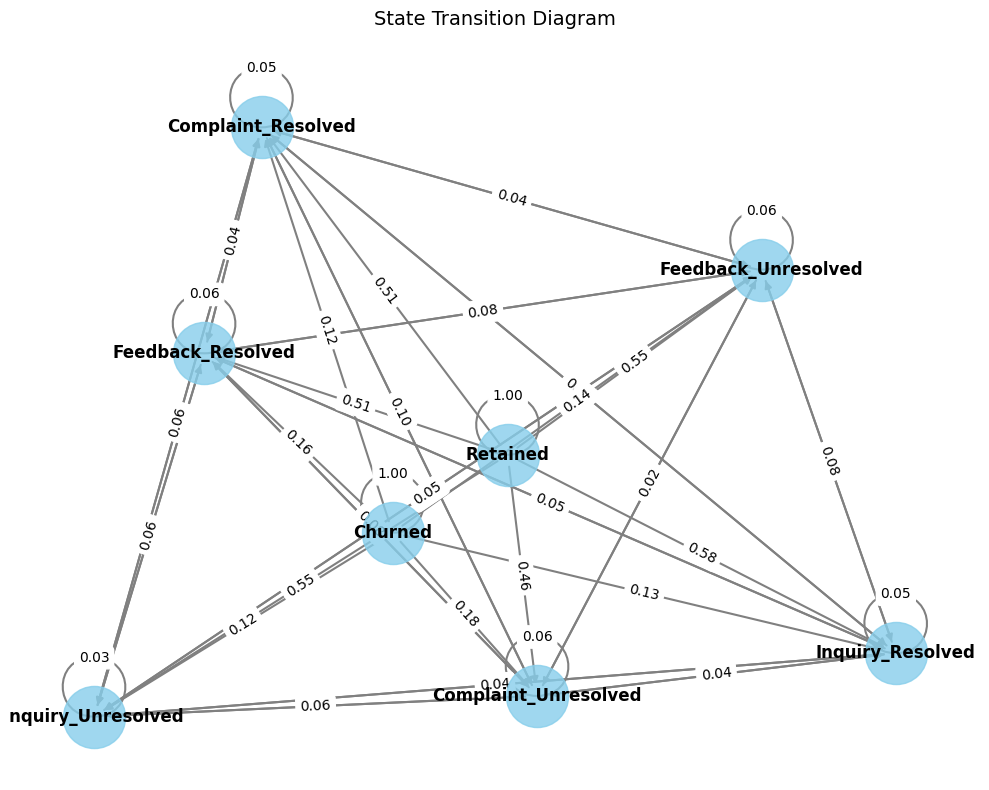

In [532]:
import networkx as nx

# 创建有向图
G = nx.DiGraph()

# 添加节点和边（仅显示概率>0的转移）
for src in transform_prob.columns:
    for dst in transform_prob.index:
        prob = transform_prob.loc[dst, src]
        if prob > 0:
            G.add_edge(src, dst, weight=prob)

# 设置图形布局
pos = nx.spring_layout(G, seed=42)  # 使用弹簧布局，可替换为其他布局（如 circular_layout）

# 绘制节点和边
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray", arrows=True)

# 标注节点名称和转移概率
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# 调整图形显示
plt.title("State Transition Diagram", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

In [406]:
transform_prob

Retained   Churned  Inquiry_Resolved  \
Churned                    NaN       NaN               NaN   
Complaint_Resolved    1.717391  0.521739          0.152174   
Complaint_Unresolved  1.430769  0.400000          0.153846   
Feedback_Resolved     1.420290  0.449275          0.101449   
Feedback_Unresolved   1.464286  0.392857          0.196429   
Inquiry_Resolved      1.800000  0.381818          0.163636   
Inquiry_Unresolved    1.720930  0.441860          0.255814   
Retained                   NaN       NaN               NaN   

                      Inquiry_Unresolved  Complaint_Unresolved  \
Churned                              NaN                   NaN   
Complaint_Resolved              0.173913              0.239130   
Complaint_Unresolved            0.138462              0.169231   
Feedback_Resolved               0.130435              0.231884   
Feedback_Unresolved             0.160714              0.053571   
Inquiry_Resolved                0.072727              0.254545   
Inquiry_Unresolved              0.093023              0.232558   
Retained                             NaN                   NaN   

                      Feedback_Unresolved  Complaint_Resolved  \
Churned                               NaN                 NaN   
Complaint_Resolved               0.173913            0.173913   
Complaint_Unresolved             0.123077            0.123077   
Feedback_Resolved                0.246377            0.144928   
Feedback_Unresolved              0.178571            0.160714   
Inquiry_Resolved                 0.163636            0.072727   
Inquiry_Unresolved               0.093023            0.162791   
Retained                              NaN                 NaN   

                      Feedback_Resolved  
Churned                             NaN  
Complaint_Resolved             0.239130  
Complaint_Unresolved           0.215385  
Feedback_Resolved              0.159420  
Feedback_Unresolved            0.267857  
Inquiry_Resolved               0.145455  
Inquiry_Unresolved             0.232558  
Retained                            NaN

In [191]:
import warnings

# 忽略 FutureWarning 类型的警告
warnings.filterwarnings("ignore", category=FutureWarning)

/var/folders/pt/0nf2m3pj1f3b373wsyfc6glh0000gn/T/ipykernel_33390/3274660440.py:19: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



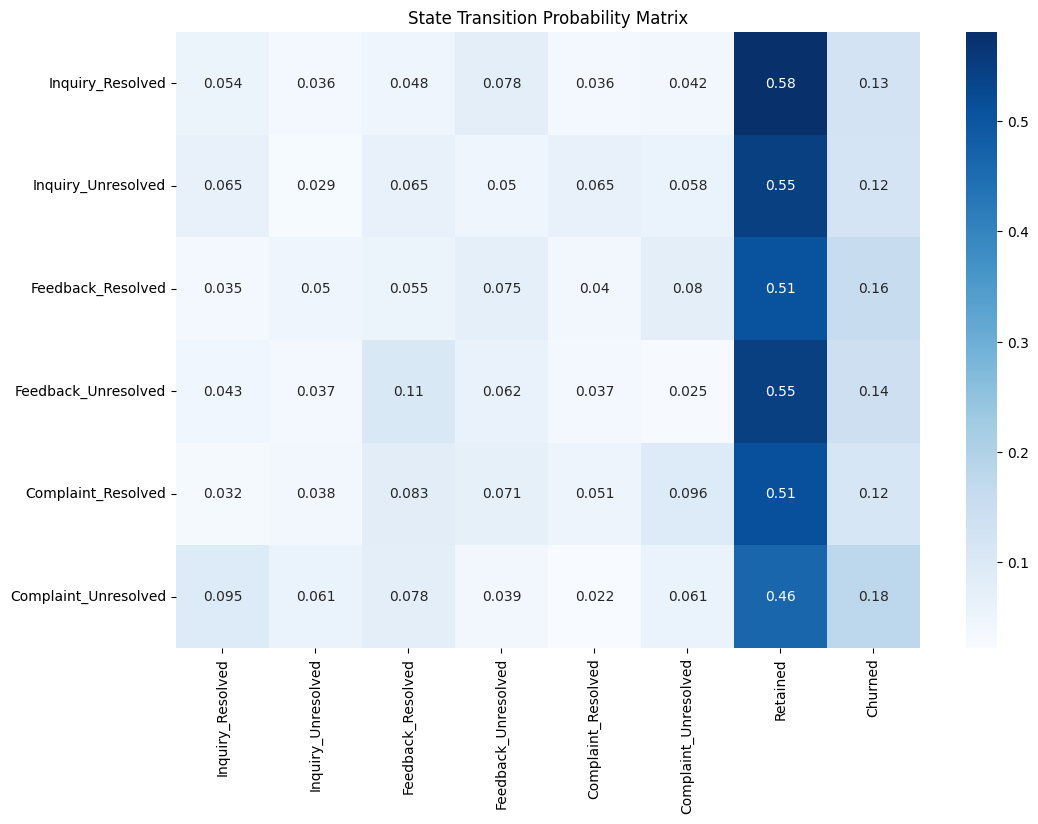

In [447]:
def add_churn_state(group):
    last_churn = group['ChurnStatus'].iloc[-1]
    if last_churn == 1:
        group.loc[len(group)] = {'State': 'Churned', 'CustomerID': group.name}
    else:
        group.loc[len(group)] = {'State': 'Retained', 'CustomerID': group.name}
    return group

df = pd.DataFrame(Customer_Service)
df['InteractionDate'] = pd.to_datetime(df['InteractionDate'])

# 按CustomerID和时间排序
df = df.sort_values(['CustomerID', 'InteractionDate'])

# 创建复合状态列
df['State'] = df['InteractionType'] + "_" + df['ResolutionStatus']


df = df.groupby('CustomerID', group_keys=False).apply(add_churn_state)

# 生成状态转移矩阵
from collections import defaultdict

# 统计转移频次
transition_counts = defaultdict(lambda: defaultdict(int))
customers = df.groupby('CustomerID')

for _, customer in customers:
    states = customer['State'].tolist()
    for i in range(len(states)-1):
        src = states[i]
        dst = states[i+1]
        transition_counts[src][dst] += 1

# 转换为概率矩阵
states = list(transition_counts.keys())
transition_matrix = pd.DataFrame(index=states, columns=states, dtype=float)

for src in transition_counts:
    total = sum(transition_counts[src].values())
    for dst in transition_counts[src]:
        transition_matrix.loc[src, dst] = transition_counts[src][dst] / total

# 可视化热力图
plt.figure(figsize=(12,8))
sns.heatmap(transition_matrix.fillna(0), annot=True, cmap='Blues')
plt.title("State Transition Probability Matrix")
plt.show()

In [431]:
df = pd.DataFrame(Customer_Service)
df['InteractionDate'] = pd.to_datetime(df['InteractionDate'])

# 按CustomerID和时间排序
df = df.sort_values(['CustomerID', 'InteractionDate'])

# 创建复合状态列
df['State'] = df['InteractionType'] + "_" + df['ResolutionStatus']

In [6]:
data['Online_Activity']

CustomerID LastLoginDate  LoginFrequency ServiceUsage
0             1    2023-10-21              34   Mobile App
1             2    2023-12-05               5      Website
2             3    2023-11-15               3      Website
3             4    2023-08-25               2      Website
4             5    2023-10-27              41      Website
..          ...           ...             ...          ...
995         996    2023-01-29              38   Mobile App
996         997    2023-04-01               5   Mobile App
997         998    2023-07-10              47      Website
998         999    2023-01-08              23      Website
999        1000    2023-08-13              22   Mobile App

[1000 rows x 4 columns]

In [548]:
test = pd.get_dummies(Transaction_History, columns=['ProductCategory'], drop_first=True)
test

CustomerID  TransactionID TransactionDate  AmountSpent  ChurnStatus  \
0              1           7194      2022-03-27       416.50            0   
1              2           7250      2022-08-08        54.96            1   
2              2           9660      2022-07-25       197.50            1   
3              2           2998      2022-01-25       101.31            1   
4              2           1228      2022-07-24       397.37            1   
...          ...            ...             ...          ...          ...   
5049        1000           2724      2022-09-08       232.06            0   
5050        1000           2917      2022-12-13       324.98            0   
5051        1000           2979      2022-06-15       375.34            0   
5052        1000           8594      2022-04-08       166.73            0   
5053        1000           5529      2022-11-23        93.73            0   

      ProductCategory_Clothing  ProductCategory_Electronics  \
0                        False                         True   
1                         True                        False   
2                        False                         True   
3                        False                        False   
4                         True                        False   
...                        ...                          ...   
5049                     False                        False   
5050                     False                        False   
5051                     False                        False   
5052                     False                        False   
5053                     False                        False   

      ProductCategory_Furniture  ProductCategory_Groceries  
0                         False                      False  
1                         False                      False  
2                         False                      False  
3                          True                      False  
4                         False                      False  
...                         ...                        ...  
5049                      False                       True  
5050                      False                      False  
5051                      False                       True  
5052                      False                      False  
5053                       True                      False  

[5054 rows x 9 columns]

In [7]:
data['Transaction_History']

CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
0              1           7194      2022-03-27       416.50     Electronics
1              2           7250      2022-08-08        54.96        Clothing
2              2           9660      2022-07-25       197.50     Electronics
3              2           2998      2022-01-25       101.31       Furniture
4              2           1228      2022-07-24       397.37        Clothing
...          ...            ...             ...          ...             ...
5049        1000           2724      2022-09-08       232.06       Groceries
5050        1000           2917      2022-12-13       324.98           Books
5051        1000           2979      2022-06-15       375.34       Groceries
5052        1000           8594      2022-04-08       166.73           Books
5053        1000           5529      2022-11-23        93.73       Furniture

[5054 rows x 5 columns]

<Axes: >

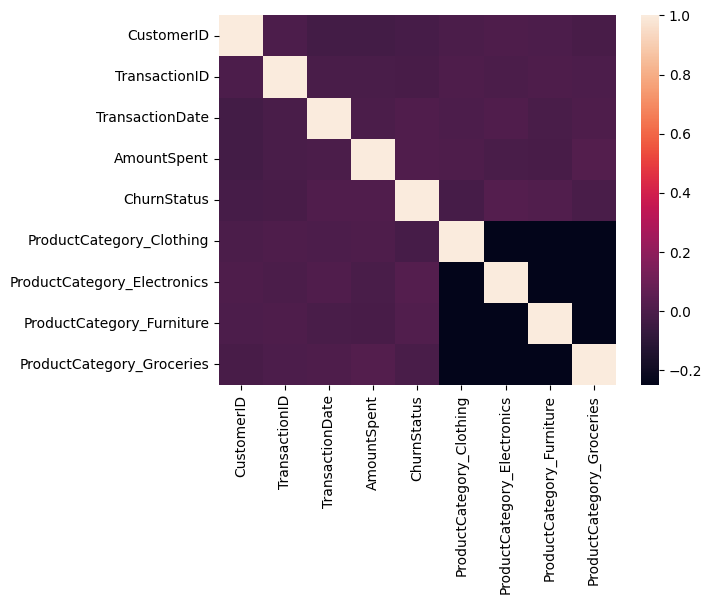

In [547]:
corr_test = test.corr()
sns.heatmap(corr_test)

In [8]:
data['Churn_Status']

CustomerID  ChurnStatus
0             1            0
1             2            1
2             3            0
3             4            0
4             5            0
..          ...          ...
995         996            0
996         997            0
997         998            0
998         999            0
999        1000            0

[1000 rows x 2 columns]

In [235]:
#transition_matrix.drop(6, axis = 0) # = [0, 0, 0, 0,0 ,0,1, 1]
transition_matrix.loc["Retained"] = [0, 0, 0, 0,0 ,0,1, 0]
transition_matrix.loc["Churned"] = [0, 0, 0, 0,0 ,0,0, 1]

In [236]:
transition_matrix

Inquiry_Resolved  Inquiry_Unresolved  Feedback_Resolved  \
Inquiry_Resolved              0.053892            0.035928           0.047904   
Inquiry_Unresolved            0.064748            0.028777           0.064748   
Feedback_Resolved             0.035176            0.050251           0.055276   
Feedback_Unresolved           0.043478            0.037267           0.105590   
Complaint_Resolved            0.032051            0.038462           0.083333   
Complaint_Unresolved          0.094972            0.061453           0.078212   
Retained                      0.000000            0.000000           0.000000   
Churned                       0.000000            0.000000           0.000000   

                      Feedback_Unresolved  Complaint_Resolved  \
Inquiry_Resolved                 0.077844            0.035928   
Inquiry_Unresolved               0.050360            0.064748   
Feedback_Resolved                0.075377            0.040201   
Feedback_Unresolved              0.062112            0.037267   
Complaint_Resolved               0.070513            0.051282   
Complaint_Unresolved             0.039106            0.022346   
Retained                         0.000000            0.000000   
Churned                          0.000000            0.000000   

                      Complaint_Unresolved  Retained   Churned  
Inquiry_Resolved                  0.041916  0.580838  0.125749  
Inquiry_Unresolved                0.057554  0.546763  0.122302  
Feedback_Resolved                 0.080402  0.507538  0.155779  
Feedback_Unresolved               0.024845  0.546584  0.142857  
Complaint_Resolved                0.096154  0.512821  0.115385  
Complaint_Unresolved              0.061453  0.463687  0.178771  
Retained                          0.000000  1.000000  0.000000  
Churned                           0.000000  0.000000  1.000000

In [199]:
pip install networkx


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: /Users/zheguan/.pyenv/versions/3.10.13/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


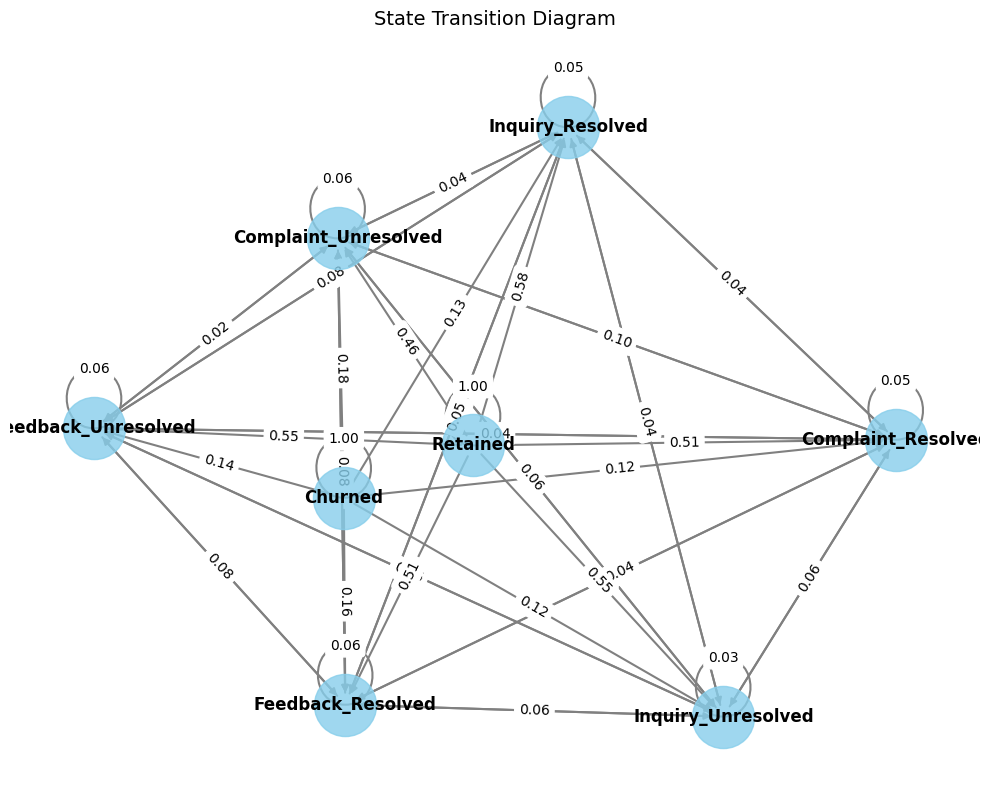

In [238]:
import networkx as nx

# 创建有向图
G = nx.DiGraph()

# 添加节点和边（仅显示概率>0的转移）
for src in transition_matrix.columns:
    for dst in transition_matrix.index:
        prob = transition_matrix.loc[dst, src]
        if prob > 0:
            G.add_edge(src, dst, weight=prob)

# 设置图形布局
pos = nx.spring_layout(G, seed=42)  # 使用弹簧布局，可替换为其他布局（如 circular_layout）

# 绘制节点和边
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray", arrows=True)

# 标注节点名称和转移概率
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# 调整图形显示
plt.title("State Transition Diagram", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

In [229]:
transition_matrix1 = transition_matrix.copy()
transition_matrix = transition_matrix.drop(["Retained","Churned"], axis = 0)

In [230]:
import plotly.graph_objects as go
import pandas as pd


# 将转移矩阵转换为桑基图所需格式
labels = list(transition_matrix.columns)  # 所有状态标签
source = []  # 源节点索引
target = []  # 目标节点索引
value = []   # 转移概率值

for src_idx, src in enumerate(transition_matrix.columns):
    for dst_idx, dst in enumerate(transition_matrix.index):
        prob = transition_matrix.loc[dst, src]
        if prob > 0:
            source.append(src_idx)
            target.append(len(labels) + dst_idx)  # 目标节点索引从 len(labels) 开始
            value.append(prob)

# 合并所有节点标签（源节点 + 目标节点）
labels += list(transition_matrix.index)

# 创建桑基图
fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["#90EE90", "#FFB6C1", "#FF4500", "#32CD32"] * 2  # 为所有节点分配颜色
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(128, 128, 128, 0.5)"  # 边颜色
    )
))

fig.update_layout(
    title_text="State Transition Flow (Sankey Diagram)",
    font_size=12,
    height=600
)
fig.show()

In [231]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: /Users/zheguan/.pyenv/versions/3.10.13/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [237]:
from graphviz import Digraph
import pandas as pd

# 示例转移矩阵


# 创建有向图
dot = Digraph(comment="State Transition Diagram", format="png")
dot.attr(
    rankdir="LR",
    splines="ortho",
    bgcolor="white",          # 背景色
    fontname="Arial",
    compound="true"           # 允许子图间连线
)

# ====================== 定义子图分组 ======================
with dot.subgraph(name="cluster_inquiry") as c:
    c.attr(
        label="Inquiry 类型",
        style="rounded,filled",
        color="#E0E0E0",
        bgcolor="#F8F8F8",
        fontname="Arial Bold",
        fontsize="14"
    )
    c.node("Inquiry_Resolved")
    c.node("Inquiry_Unresolved")

with dot.subgraph(name="cluster_feedback") as c:
    c.attr(
        label="Feedback 类型",
        style="rounded,filled",
        color="#E0E0E0",
        bgcolor="#F8F8F8",
        fontname="Arial Bold",
        fontsize="14"
    )
    c.node("Feedback_Resolved")
    c.node("Feedback_Unresolved")

with dot.subgraph(name="cluster_complaint") as c:
    c.attr(
        label="Complaint 类型",
        style="rounded,filled",
        color="#E0E0E0",
        bgcolor="#F8F8F8",
        fontname="Arial Bold",
        fontsize="14"
    )
    c.node("Complaint_Resolved")
    c.node("Complaint_Unresolved")

# ====================== 定义节点样式 ======================
node_style = {
    "Inquiry_Resolved":       ("#90EE90:#32CD32", "#2F4F4F"),
    "Inquiry_Unresolved":     ("#32CD32:#006400", "#2F4F4F"),
    "Feedback_Resolved":      ("#87CEEB:#4169E1", "#2F4F4F"),
    "Feedback_Unresolved":    ("#4169E1:#000080", "#2F4F4F"),
    "Complaint_Resolved":     ("#FFB6C1:#FF4500", "#2F4F4F"),
    "Complaint_Unresolved":   ("#FF4500:#8B0000", "#2F4F4F"),
    "Retained":               ("#32CD32", "#2F4F4F"),
    "Churned":                ("#FF4500", "#2F4F4F")
}

for state in transition_matrix.columns:
    if state in ["Retained", "Churned"]:
        # 终止状态使用特殊形状
        dot.node(
            state,
            label=state.replace("_", "\n"),
            shape="ellipse",
            style="filled",
            fillcolor=node_style[state][0],
            color=node_style[state][1],
            fontname="Arial Bold",
            fontsize="12",
            penwidth="1.5"
        )
    else:
        # 普通状态使用渐变填充
        dot.node(
            state,
            label=state.replace("_", "\n"),
            shape="box",
            style="filled,rounded",
            gradientangle="45",
            fillcolor=node_style[state][0],
            color=node_style[state][1],
            fontname="Arial Bold",
            fontsize="12",
            penwidth="1.5"
        )

# ====================== 添加边 ======================
threshold = 0.05
for src in transition_matrix.columns:
    for dst in transition_matrix.index:
        prob = transition_matrix.loc[dst, src]
        if prob > threshold:
            dot.edge(
                src, 
                dst,
                label=f"{prob:.2f}",
                fontname="Arial",
                fontsize="10",
                color="#708090",
                arrowsize="0.8",
                arrowhead="vee",
                style="dashed" if prob < 0.2 else "solid",  # 低概率用虚线
                penwidth=str(prob*5)
            )

# ====================== 生成文件 ======================
dot.render("state_transition_advanced.gv", view=True)
print("优化后的状态转移图已生成：state_transition_advanced.gv.png")

优化后的状态转移图已生成：state_transition_advanced.gv.png


In [458]:
transform_prob = np.array(transform_prob)
n = transform_prob.shape[0]
A = transform_prob.T - np.eye(n)
A[-1, :] = 1  # 添加约束条件 Σπ_i = 1

# 右侧向量 b
b = np.zeros(n)
b[-1] = 1

# 求解线性方程组
pi = np.linalg.lstsq(A, b, rcond=None)[0]
print("稳态分布:", pi)

稳态分布: [0.54504707 0.17395779 0.05244972 0.02784315 0.07047293 0.04608878
 0.03160372 0.05253684]


In [453]:
transform_prob

array([[0.58928571, 0.125     , 0.05357143, 0.02380952, 0.08333333,
        0.05357143, 0.02380952, 0.04761905],
       [0.5323741 , 0.13669065, 0.07913669, 0.02877698, 0.07194245,
        0.02877698, 0.05035971, 0.07194245],
       [0.49246231, 0.15577889, 0.03517588, 0.04522613, 0.08040201,
        0.08542714, 0.05025126, 0.05527638],
       [0.50931677, 0.13664596, 0.06832298, 0.05590062, 0.01863354,
        0.0621118 , 0.05590062, 0.0931677 ],
       [0.50641026, 0.15384615, 0.04487179, 0.05128205, 0.07051282,
        0.05128205, 0.05128205, 0.07051282],
       [0.51955307, 0.1452514 , 0.05586592, 0.05027933, 0.06145251,
        0.04469274, 0.04469274, 0.07821229]])

In [240]:
A

Inquiry_Resolved  Inquiry_Unresolved  Feedback_Resolved  \
Inquiry_Resolved             -0.946108            0.064748           0.035176   
Inquiry_Unresolved            0.035928           -0.971223           0.050251   
Feedback_Resolved             0.047904            0.064748          -0.944724   
Feedback_Unresolved           0.077844            0.050360           0.075377   
Complaint_Resolved            0.035928            0.064748           0.040201   
Complaint_Unresolved          0.041916            0.057554           0.080402   
Retained                      0.580838            0.546763           0.507538   
Churned                       0.125749            0.122302           0.155779   

                      Feedback_Unresolved  Complaint_Resolved  \
Inquiry_Resolved                 0.043478            0.032051   
Inquiry_Unresolved               0.037267            0.038462   
Feedback_Resolved                0.105590            0.083333   
Feedback_Unresolved             -0.937888            0.070513   
Complaint_Resolved               0.037267           -0.948718   
Complaint_Unresolved             0.024845            0.096154   
Retained                         0.546584            0.512821   
Churned                          0.142857            0.115385   

                      Complaint_Unresolved  Retained  Churned  
Inquiry_Resolved                  0.094972       0.0      0.0  
Inquiry_Unresolved                0.061453       0.0      0.0  
Feedback_Resolved                 0.078212       0.0      0.0  
Feedback_Unresolved               0.039106       0.0      0.0  
Complaint_Resolved                0.022346       0.0      0.0  
Complaint_Unresolved             -0.938547       0.0      0.0  
Retained                          0.463687       0.0      0.0  
Churned                           0.178771       0.0      0.0

In [460]:
Transaction_History = data["Transaction_History"]

In [461]:
Transaction_History

CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
0              1           7194      2022-03-27       416.50     Electronics
1              2           7250      2022-08-08        54.96        Clothing
2              2           9660      2022-07-25       197.50     Electronics
3              2           2998      2022-01-25       101.31       Furniture
4              2           1228      2022-07-24       397.37        Clothing
...          ...            ...             ...          ...             ...
5049        1000           2724      2022-09-08       232.06       Groceries
5050        1000           2917      2022-12-13       324.98           Books
5051        1000           2979      2022-06-15       375.34       Groceries
5052        1000           8594      2022-04-08       166.73           Books
5053        1000           5529      2022-11-23        93.73       Furniture

[5054 rows x 5 columns]

<Axes: xlabel='ChurnStatus', ylabel='AmountSpent'>

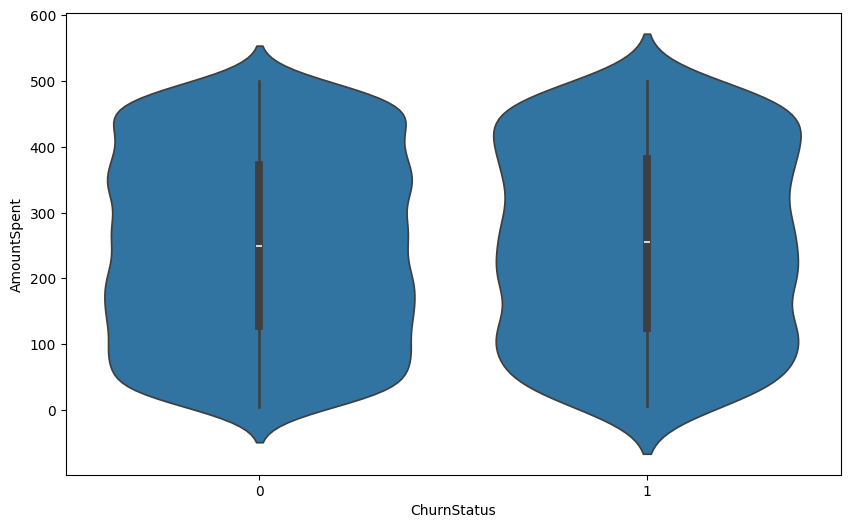

In [578]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x="ChurnStatus" , y= "AmountSpent"
               , data=Transaction_History)

<Axes: xlabel='AmountSpent', ylabel='Count'>

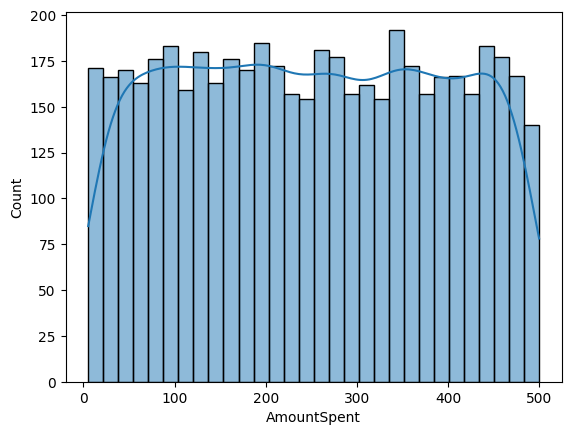

In [586]:
sns.histplot(Transaction_History["AmountSpent"], bins=30, kde=True)

In [601]:
df_diff = Transaction_History.groupby("CustomerID")["AmountSpent"].agg(
    First_Transaction="min",
    Last_Transaction="max",
    total_Transaction = "sum",
    mean_Transaction = "mean",
    count_Transaction = "count"
)

# 计算时间差（以天为单位）
df_diff["Days_Difference"] = (df_diff["Last_Transaction"] - df_diff["First_Transaction"])


In [603]:
test1 = pd.merge(df_diff, data["Churn_Status"],how = "left", on = "CustomerID")
test1.drop(columns=["CustomerID"]).corr()

First_Transaction  Last_Transaction  total_Transaction  \
First_Transaction           1.000000          0.004204          -0.237619   
Last_Transaction            0.004204          1.000000           0.665674   
total_Transaction          -0.237619          0.665674           1.000000   
mean_Transaction            0.644168          0.676302           0.384062   
count_Transaction          -0.480991          0.536729           0.898256   
Days_Difference            -0.683793          0.726794           0.648942   
ChurnStatus                 0.019528          0.034865           0.001324   

                   mean_Transaction  count_Transaction  Days_Difference  \
First_Transaction          0.644168          -0.480991        -0.683793   
Last_Transaction           0.676302           0.536729         0.726794   
total_Transaction          0.384062           0.898256         0.648942   
mean_Transaction           1.000000           0.046537         0.051032   
count_Transaction          0.046537           1.000000         0.722016   
Days_Difference            0.051032           0.722016         1.000000   
ChurnStatus                0.044811          -0.008598         0.012028   

                   ChurnStatus  
First_Transaction     0.019528  
Last_Transaction      0.034865  
total_Transaction     0.001324  
mean_Transaction      0.044811  
count_Transaction    -0.008598  
Days_Difference       0.012028  
ChurnStatus           1.000000

In [605]:
import pandas as pd

corr_matrix = test1.drop(columns=["CustomerID"]).corrwith(test1["ChurnStatus"])  
print(corr_matrix)


First_Transaction    0.019528
Last_Transaction     0.034865
total_Transaction    0.001324
mean_Transaction     0.044811
count_Transaction   -0.008598
Days_Difference      0.012028
ChurnStatus          1.000000
dtype: float64


In [463]:
Transaction_History = pd.merge(Transaction_History, data["Churn_Status"],how = "left", on = "CustomerID")

In [470]:
final_Transactionstatus = (Transaction_History.groupby("CustomerID", group_keys=False)[["ChurnStatus"]]
                .apply(lambda x : x.iloc[-1] )
                .reset_index()
                .rename(columns={"ChurnStatus": "ProductCategory"}))

In [471]:
final_Transactionstatus

CustomerID  ProductCategory
0             1                0
1             2                1
2             3                0
3             4                0
4             5                0
..          ...              ...
995         996                0
996         997                0
997         998                0
998         999                0
999        1000                0

[1000 rows x 2 columns]

In [480]:
combined_transaction = pd.concat([Transaction_History, final_Transactionstatus], axis = 0)
combined_transaction["ProductCategory"] = combined_transaction["ProductCategory"].replace({0:"Retained", 1:"Churned"})

In [484]:
combined_transaction = combined_transaction.sort_values(["CustomerID","TransactionID"])

In [485]:
combined_transaction

CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory  \
0              1         7194.0      2022-03-27       416.50     Electronics   
0              1            NaN             NaT          NaN        Retained   
4              2         1228.0      2022-07-24       397.37        Clothing   
3              2         2998.0      2022-01-25       101.31       Furniture   
6              2         3527.0      2022-09-16       311.34     Electronics   
...          ...            ...             ...          ...             ...   
5051        1000         2979.0      2022-06-15       375.34       Groceries   
5053        1000         5529.0      2022-11-23        93.73       Furniture   
5048        1000         7005.0      2022-08-14       477.95       Furniture   
5052        1000         8594.0      2022-04-08       166.73           Books   
999         1000            NaN             NaT          NaN        Retained   

      ChurnStatus  
0             0.0  
0             NaN  
4             1.0  
3             1.0  
6             1.0  
...           ...  
5051          0.0  
5053          0.0  
5048          0.0  
5052          0.0  
999           NaN  

[6054 rows x 6 columns]

In [486]:
chains = combined_transaction.groupby("CustomerID")["ProductCategory"].apply(list)
transform_transaction = defaultdict(lambda: defaultdict(int))

for i in chains:
    #print(i[0])
    for k in range(len(i)-1):
        src = i[k]
        des = i[k+1]
        transform_transaction[src][des] += 1
        #print(src,des)

In [498]:
transition_transaction = pd.DataFrame(transform_transaction).T
transition_transaction_prob = transition_transaction.div(transition_transaction.sum(axis = 1), axis = 0)

In [499]:
transition_transaction_prob.loc["Retained"] = [1, 0,0,0,0,0,0]
transition_transaction_prob.loc["Churned"] = [0, 0,0,1,0,0,0]
expected_order = ["Retained", "Churned", "Clothing", "Groceries" , "Furniture", "Electronics", "Books"]

# 重新排序 DataFrame，确保行列顺序一致
transition_transaction_prob = transition_transaction_prob.reindex(index=expected_order, columns=expected_order)


In [500]:
transition_transaction_prob

Retained   Churned  Clothing  Groceries  Furniture  Electronics  \
Retained     1.000000  0.000000  0.000000   0.000000   0.000000     0.000000   
Churned      0.000000  1.000000  0.000000   0.000000   0.000000     0.000000   
Clothing     0.173000  0.050000  0.156000   0.162000   0.154000     0.145000   
Groceries    0.162745  0.037255  0.185294   0.150000   0.154902     0.163725   
Furniture    0.138105  0.040323  0.152218   0.166331   0.160282     0.168347   
Electronics  0.153846  0.035964  0.152847   0.158841   0.164835     0.157842   
Books        0.159462  0.038425  0.160423   0.151777   0.166186     0.163305   

                Books  
Retained     0.000000  
Churned      0.000000  
Clothing     0.160000  
Groceries    0.146078  
Furniture    0.174395  
Electronics  0.175824  
Books        0.160423

In [501]:
transition_transaction_prob = np.array(transition_transaction_prob)
n = transition_transaction_prob.shape[0]
A = transition_transaction_prob.T - np.eye(n)
A[-1, :] = 1  # 添加约束条件 Σπ_i = 1

# 右侧向量 b
b = np.zeros(n)
b[-1] = 1

# 求解线性方程组
pi = np.linalg.lstsq(A, b, rcond=None)[0]
print("稳态分布:", pi)

稳态分布: [ 5.00000000e-01  5.00000000e-01 -1.25761146e-15 -1.20210031e-15
 -1.17434474e-15 -1.18567590e-15 -1.11883358e-15]


In [594]:
import numpy as np
import scipy.linalg

# 定义转移概率矩阵（请替换为你的数据）
P = np.array(transition_transaction_prob)

# **1. 计算吸收概率**
# 找到吸收状态索引（对角线为1的状态）
absorbing_states = np.where(np.diag(P) == 1)[0]
transient_states = np.where(np.diag(P) != 1)[0]

# 提取 Q 和 R 子矩阵
Q = P[np.ix_(transient_states, transient_states)]
R = P[np.ix_(transient_states, absorbing_states)]

# 计算基础矩阵 N = (I - Q)^(-1)
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)

# 计算吸收概率矩阵 B = N @ R
B = N @ R
print("吸收概率矩阵 B：\n", B)

# **2. 计算稳态概率**
# 取非吸收状态的子矩阵 Q
eigvals, eigvecs = np.linalg.eig(P.T)  # 计算 P^T 的特征向量
steady_state = eigvecs[:, np.isclose(eigvals, 1)]  # 选择特征值为1的特征向量
steady_state = steady_state[:, 0] / np.sum(steady_state[:, 0])  # 归一化

print("\n稳态概率分布：\n", steady_state.real)


吸收概率矩阵 B：
 [[0.79131904 0.20868096]
 [0.79921768 0.20078232]
 [0.7919957  0.2080043 ]
 [0.79860613 0.20139387]
 [0.79771736 0.20228264]]

稳态概率分布：
 [1. 0. 0. 0. 0. 0. 0.]


In [597]:
v = N@np.ones(5) 
v

array([4.92638187, 5.03992245, 5.15369767, 5.09620606, 5.05487213])

In [598]:
#expected_order = ["Retained", "Churned", "Inquiry_Resolved", "Inquiry_Unresolved" , "Feedback_Resolved", "Feedback_Unresolved", "Complaint_Resolved", "Complaint_Unresolved"]

import numpy as np
import scipy.linalg

# 定义转移概率矩阵（请替换为你的数据）
P = np.array(transform_prob)

# **1. 计算吸收概率**
# 找到吸收状态索引（对角线为1的状态）
absorbing_states = np.where(np.diag(P) == 1)[0]
transient_states = np.where(np.diag(P) != 1)[0]

# 提取 Q 和 R 子矩阵
Q = P[np.ix_(transient_states, transient_states)]
R = P[np.ix_(transient_states, absorbing_states)]

# 计算基础矩阵 N = (I - Q)^(-1)
I = np.eye(Q.shape[0])
N = np.linalg.inv(I - Q)

# 计算吸收概率矩阵 B = N @ R
B = N @ R
print("吸收概率矩阵 B：\n", B)

# **2. 计算稳态概率**
# 取非吸收状态的子矩阵 Q
eigvals, eigvecs = np.linalg.eig(P.T)  # 计算 P^T 的特征向量
steady_state = eigvecs[:, np.isclose(eigvals, 1)]  # 选择特征值为1的特征向量
steady_state = steady_state[:, 0] / np.sum(steady_state[:, 0])  # 归一化

print("\n稳态概率分布：\n", steady_state.real)


吸收概率矩阵 B：
 [[0.80700758 0.19299242]
 [0.80678326 0.19321674]
 [0.77081632 0.22918368]
 [0.79064724 0.20935276]
 [0.80247131 0.19752869]
 [0.74481898 0.25518102]]

稳态概率分布：
 [1. 0. 0. 0. 0. 0. 0. 0.]


In [600]:
v = N@np.ones(6) 
v

array([1.43481689, 1.49631122, 1.50511283, 1.46420126, 1.55951148,
       1.53220443])